# Order Statistics Conjecture

[Original problem statement](http://jeffrouder.blogspot.com/2019/)

Given a continuous(?) distribution, sample to sets of variables $X, Y$, each of size $n$. Define

$$
A = \left\{i:\; X_i < Y_i\right\}
$$

The conjecture is that that $|A|$ obeys a uniform distribution of the integers $0, 1,\ldots,n$.

It is clear that we can assume a uniform distribution by converting to quantiles without loss of generality.

First, let's simulate to reproduce the result

In [18]:
%matplotlib inline
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

figdir = Path('../assets/img/2020-01-10-sorted-random-variables/').resolve()

In [14]:
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['xtick.labelsize'] = 'large'
plt.rcParams['ytick.labelsize'] = 'large'

In [2]:
def generate(n):
    return np.sort(np.random.rand(n))

def evaluate(x, y):
    return np.sum(x < y)

Verify empirically

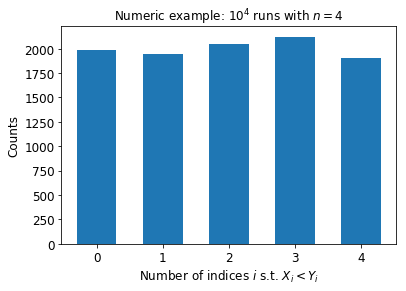

In [20]:
n = 4

res = [evaluate(generate(n), generate(n)) for _ in range(10000)]

fig, ax = plt.subplots()
ax.hist(res, rwidth=.6, bins=np.linspace(-.5, n + .5, n + 2))

ax.set_xlabel('Number of indices $i$ s.t. $X_i < Y_i$')
ax.set_ylabel('Counts')
ax.set_title('Numeric example: $10^4$ runs with $n = 4$')

fig.savefig(figdir / 'sampling.png')
pass

# Alternative process: Sample all and label

We could as well get a sample of size $2n$ first, sort it, and label elements with a color ($n$ each), e.g. red for target and blue for other. To determine the result, we iterate through the sequence and count colors. If we see a red ball, we add one to the result if the number of red balls (including the current one) is greater than the number of black balls.

The process can be viewed on a trellis with a single source (no balls drawn) and sink (all balls drawn). The vertical axis is difference of red - black. Each path corresponds to a partition. Since all partitions are equally probable, all paths through the trellis have equal weight. The target quantity is the number of upward links crossed that are above the center.

Hence the conjecture says that the number of paths containing $k$ flagged links is independent of $k$.

Now denote the number of paths joining two nodes on the diagonal with distance $i$ and number or red edges $a$ by $f(i, a)$. In addition to all such paths we can define a primitive class of paths that does not visit the diagonal between its beginning and end. A primitive path of length $i$ covers either zero or $i$ red edges. Denote the number of primitive paths with  $a$ edges by $g(i, a)$, where $g(i, a) = 0$ for $0 < a < i$. Then we have the recurrence

$$
\begin{align}
f(0, a) &= \delta_{a, 0} \\
f(i, a) &= \sum_{k = 1}^{i} \sum_{b = 0}^a f(i - k, a - b) g(k, b) \\
&= \sum_{k = 1}^{i} g(k) \left[f(i - k, a - k) + f(i - k, a)\right] \\
&= \sum_{k = 1}^{a} g(k) f(i - k, a - k) + \sum_{k = 1}^{i - a} g(k) f(i - k, a)
\end{align}
$$

The number of primitive paths $g(k)$ can be expressed with the Catalan numbers 

$$
C_n = \frac{1}{n + 1}\begin{pmatrix}2n \\ n\end{pmatrix}
$$

as 

$$
g(n) = C_{n - 1}
$$

In [ ]:
n = 5

counts = np.zeros((n + 1, n + 1, n + 1))
counts[0, 0, 0] = 1
for i in range(0, n + 1):
    if i > 0:
        for j in range(n + 1):
            counts[i, j] += counts[i - 1, j]
    for j in range(1, n + 1):
        if j > i:
            counts[i, j, 1:] += counts[i, j - 1, :-1]
        else:
            counts[i, j] += counts[i, j - 1]

In [ ]:
for i in range(n + 1):
    for j in range(i, n + 1):
        i, j = sorted([i, j])
        d = j - i
        assert np.all(counts[i, j, d:j + 1] == counts[j, i, :j + 1 - d][::-1])

In [ ]:
i, j = 4, 5
counts[i, j], counts[j, i]

In [31]:
pathstr = 'rbbrrrbbrb'
path = [[0, 0]]
for symbol in pathstr:
    if symbol == 'r':
        path.append([path[-1][0] + 1, path[-1][1]])
    else:
        path.append([path[-1][0], path[-1][1] + 1])
        
path = np.array(path)

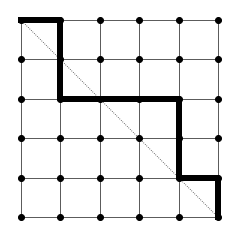

In [39]:
n = 5

base = np.arange(n + 1)
lim = base[[0, -1]]
x, y = np.meshgrid(base, base)

fig, ax = plt.subplots(figsize=(4, 4))

ax.set_aspect(1)
ax.invert_yaxis()

for i in base:
    ax.plot([i, i], lim, 'k-', linewidth=.8, alpha=.8)
    ax.plot(lim, [i, i], 'k-', linewidth=.8, alpha=.8)
#     ax.plot([i, lim[-1]], [i, i], 'r-', linewidth=2)
#     ax.plot([i, i], [i, lim[-1]], 'b-', linewidth=2)
ax.plot(path[:, 0], path[:, 1], 'k-', linewidth=6)

ax.plot(lim, lim, 'k:', linewidth=.8, alpha=.8)
ax.plot(x.ravel(), y.ravel(), 'ko')

ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
    
fig.savefig(figdir / 'path-representation.png')

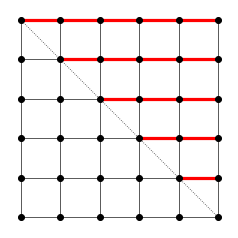

In [40]:
n = 5

base = np.arange(n + 1)
lim = base[[0, -1]]
x, y = np.meshgrid(base, base)

fig, ax = plt.subplots(figsize=(4, 4))

ax.set_aspect(1)
ax.invert_yaxis()

for i in base:
    ax.plot([i, i], lim, 'k-', linewidth=.8, alpha=.8)
    ax.plot(lim, [i, i], 'k-', linewidth=.8, alpha=.8)
    ax.plot([i, lim[-1]], [i, i], 'r-', linewidth=3.2)
#     ax.plot([i, i], [i, lim[-1]], 'b-', linewidth=2)
ax.plot(lim, lim, 'k:', linewidth=.8, alpha=.8)
ax.plot(x.ravel(), y.ravel(), 'ko')

ax.set_xticks([])
ax.set_yticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
    
fig.savefig(figdir / 'labelled-edges.png')